# 1. Import the needed libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#from pandas_profiling import ProfileReport
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.feature_selection import mutual_info_classif,RFE,RFECV
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

# 2. Import data

In [2]:
#to read in jupyter
train_demo = pd.read_excel('train_demo.xlsx')
train_health = pd.read_excel('train_health.xlsx')
train_habits = pd.read_excel('train_habits.xlsx') 

test_health = pd.read_excel('test_health.xlsx')
test_demo = pd.read_excel('test_demo.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')

In [3]:
# to read in kaggle

#train_demo=pd.read_excel('/kaggle/input/the-smith-parasite/train_demo.xlsx')
#train_health=pd.read_excel('/kaggle/input/the-smith-parasite/train_health.xlsx')
#train_habits=pd.read_excel('/kaggle/input/the-smith-parasite/train_habits.xlsx') 

#test_demo=pd.read_excel('/kaggle/input/the-smith-parasite/test_demo.xlsx')
#test_health=pd.read_excel('/kaggle/input/the-smith-parasite/test_health.xlsx')
#test_habits=pd.read_excel('/kaggle/input/the-smith-parasite/test_habits.xlsx')

# 3. Explore the data

In [3]:
# training sets
train_habits['PatientID'].equals(other=train_health['PatientID'])  #a confirmar se os patient id coincidem
train_habits['PatientID'].equals(other=train_demo['PatientID'])

# test sets
test_habits['PatientID'].equals(other=test_health['PatientID'])
test_habits['PatientID'].equals(other=test_demo['PatientID'])

True

In [4]:
# Merging the training sets into a dataframe called 'train_data'
train_data=pd.merge(pd.merge(train_habits,train_health,how='inner',on='PatientID'),train_demo,how='inner',on='PatientID')
train_data

,PatientID,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Name,Birth_Year,Region,Education,Disease
0,1167,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1
1,1805,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1
2,1557,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1
3,1658,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...,Mr. David Caffee,1958,London,University Complete (3 or more years),0
4,1544,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1909,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,178,61,204,144,12,4,Not sure,Neither I nor my immediate family have diabetes.,Mr. Philip Klink,1972,East Midlands,High School Incomplete (10th to 11th grade),0
796,1386,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,157,61,213,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,Mrs. Jackie Valencia,1980,North West,Elementary School (1st to 9th grade),1
797,1088,No,I consider myself a social drinker,No,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,167,48,272,140,20,17,More than 3 years,Neither I nor my immediate family have diabetes.,Mrs. Cheryl Harris,1860,East Midlands,Elementary School (1st to 9th grade),0
798,1662,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,165,75,208,112,16,0,More than 3 years,Neither I nor my immediate family have diabetes.,Mr. Florencio Doherty,1975,East of England,Elementary School (1st to 9th grade),1


In [5]:
# Merging the test sets into a dataframe called 'test_data'
test_data=pd.merge(pd.merge(test_habits,test_health,how='inner',on='PatientID'),test_demo,how='inner',on='PatientID')
test_data

,PatientID,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Name,Birth_Year,Region,Education
0,1343,Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,172,80,203,172,20,2,Not sure,I have/had pregnancy diabetes or borderline di...,Mr. Ricardo Sherman,1970,East Midlands,Elementary School (1st to 9th grade)
1,1727,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,171,80,225,130,21,0,Not sure,I do have diabetes,Mr. Jessie Strickland,1966,Yorkshire and the Humber,University Complete (3 or more years)
2,1828,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,171,78,237,130,24,1,More than 3 years,I have/had pregnancy diabetes or borderline di...,Mr. Robert Foreman,1978,West Midlands,High School Incomplete (10th to 11th grade)
3,1155,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Less than half a liter,174,87,313,108,19,0,Not sure,I do have diabetes,Mr. Edwin Ferguson,1968,Yorkshire and the Humber,High School Incomplete (10th to 11th grade)
4,1020,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Less than half a liter,172,56,189,140,19,14,More than 3 years,I have/had pregnancy diabetes or borderline di...,Mr. Eliseo Krefft,1962,East Midlands,High School Incomplete (10th to 11th grade)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,1000,No,I usually consume alcohol every day,No,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,178,89,216,125,22,4,Not sure,Neither I nor my immediate family have diabetes.,Mr. John Eichhorn,1970,East Midlands,University Incomplete (1 to 2 years)
221,1256,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Less than half a liter,154,63,187,138,25,6,More than 3 years,Neither I nor my immediate family have diabetes.,Mrs. Tiffany Medley,1987,West Midlands,University Complete (3 or more years)
222,1318,No,I usually consume alcohol every day,Yes,1 to 2 pieces of fruit in average,Between one liter and two liters,173,90,181,140,20,0,Not sure,Neither I nor my immediate family have diabetes.,Mr. Kenneth Crase,1963,East Midlands,High School Graduate
223,1953,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,155,45,240,138,18,0,More than 3 years,Neither I nor my immediate family have diabetes.,Mrs. Tracy Williams,1977,East Midlands,High School Incomplete (10th to 11th grade)


In [7]:
# Generating a profile report to better explore the data
ProfileReport(
    train_data,
    title='The Smith Parasite - Training Data',
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },                 #há 2 Mr. Gary Miller mas com diferentes dados portanto não é um erro
)

NameError: name 'ProfileReport' is not defined

In [6]:
# There are 2 people with the name 'Mr. Gary Miller', but they have diferent information, so it is not an error
train_data.loc[train_data['Name'] == 'Mr. Gary Miller']

,PatientID,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Name,Birth_Year,Region,Education,Disease
168,1221,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,Less than half a liter,172,65,258,130,17,6,Not sure,Neither I nor my immediate family have diabetes.,Mr. Gary Miller,1959,North West,University Complete (3 or more years),0
491,1694,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,178,61,223,118,15,5,Not sure,Neither I nor my immediate family have diabetes.,Mr. Gary Miller,1983,South West,I never attended school / Other,0


In [7]:
# checking the data type of each column
train_data.dtypes

PatientID            int64
Smoking_Habit       object
Drinking_Habit      object
Exercise            object
Fruit_Habit         object
Water_Habit         object
Height               int64
Weight               int64
High_Cholesterol     int64
Blood_Pressure       int64
Mental_Health        int64
Physical_Health      int64
Checkup             object
Diabetes            object
Name                object
Birth_Year           int64
Region              object
Education           object
Disease              int64
dtype: object

In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,800.0,1513.99875,300.874630,1001.0,1247.50,1519.5,1777.25,2024.0
Height,800.0,167.80625,7.976888,151.0,162.00,167.0,173.00,180.0
Weight,800.0,67.82750,12.113470,40.0,58.00,68.0,77.00,97.0
High_Cholesterol,800.0,249.32250,51.566631,130.0,213.75,244.0,280.00,568.0
Blood_Pressure,800.0,131.05375,17.052693,94.0,120.00,130.0,140.00,200.0
Mental_Health,800.0,17.34500,5.385139,0.0,13.00,18.0,21.00,29.0
Physical_Health,800.0,4.55875,5.449189,0.0,0.00,3.0,7.00,30.0
Birth_Year,800.0,1966.04375,15.421872,1855.0,1961.00,1966.0,1974.00,1993.0
Disease,800.0,0.51375,0.500124,0.0,0.00,1.0,1.00,1.0


# 4. Preprocessing the data

In [9]:
# making a copy of 'train_data'
train_data_original=train_data.copy()

## 4.1 Inconsistencies/ incoherences

In [10]:
#estava a pensar começar por tratar os valores que não fazem sentido, depois missing values e a seguir voltar aos outliers
# Correcting the values 'LONDON' to 'London' in the column 'Region'
train_data.replace("LONDON", 'London', inplace=True)

train_data['Region'].unique()

array(['London', 'South West', 'Yorkshire and the Humber', 'South East',
       'East Midlands', 'West Midlands', 'East of England', 'North West',
       'North East'], dtype=object)

In [11]:
# So we assume that all the values that start with '18' are supposed to start with '19'
def birth_replace(x):      #quando fazer feature selection   #considerar como na
    x=str(x)
    if x[0]=='1' and x[1]=='8':
        x=x[0]+'9'+x[2:]
    else:
        x
    return int(x)

# Correcting the column 'Birth_Year', by applying the function created above
train_data['Birth_Year']=train_data['Birth_Year'].apply(birth_replace) #eram somente 12 valores, todos a começar por 18 e com valores excessivos(o mínimo era 141 anos) portanto assumi que antes de 8 queriam colocar 9

In [12]:
#checkup tem imensos valores com not sure (39%), vale a pena manter a feature?/devemos tratar not sure como missing values, sendo que pode indicar 'negligencia'?
#na for education
#moda não parece bom até porque as categorias têm valores semelhantes
#também não parece fazer muito sentido retirar essas linhas, tendo em conta a perda de informação
#podemos depois testar o modelo com e sem as linhas para ver qual a melhor performance
#estou a fazer assim e não a usar o ordinal encoder porque com o ordinal não consigo escolher qual string fica com qual número

train_data['Education'].unique()
classification_education={'I never attended school / Other':0,'Elementary School (1st to 9th grade)':1,'High School Incomplete (10th to 11th grade)':2,'High School Graduate':3,'University Incomplete (1 to 2 years)':4,'University Complete (3 or more years)':5}
train_data['Education']=train_data['Education'][~train_data['Education'].isnull()].apply(lambda x:classification_education[x]) #manter os na em education

train_data['Diabetes'].unique()
classification_diabetes={'Neither I nor my immediate family have diabetes.':0,"I don't have diabetes, but I have direct family members who have diabetes.":1,'I have/had pregnancy diabetes or borderline diabetes':2,'I do have diabetes':3}
train_data['Diabetes']=train_data['Diabetes'].apply(lambda x:classification_diabetes[x])

train_data['Drinking_Habit'].unique()
classification_drinking={'I do not consume any type of alcohol':0,'I consider myself a social drinker':1,'I usually consume alcohol every day':2}
train_data['Drinking_Habit']=train_data['Drinking_Habit'].apply(lambda x:classification_drinking[x])

train_data['Fruit_Habit'].unique()
classification_fruit={'Less than 1. I do not consume fruits every day.':0,'1 to 2 pieces of fruit in average':1,'3 to 4 pieces of fruit in average':2,'5 to 6 pieces of fruit in average':3,'More than six pieces of fruit':4} #perguntar à professora sobre valores
train_data['Fruit_Habit']=train_data['Fruit_Habit'].apply(lambda x:classification_fruit[x])

train_data['Water_Habit'].unique()
classification_water={'Less than half a liter':0,'More than half a liter but less than one liter':1,'Between one liter and two liters':2}
train_data['Water_Habit']=train_data['Water_Habit'].apply(lambda x:classification_water[x])

In [13]:
oenc=OneHotEncoder(drop='first',sparse=False)        #because of 'not sure' i put here also checkup
onehot_features=['Smoking_Habit','Exercise','Region','Checkup']         #very high correlation for checkup so I changed the values of not sure to more than 3 years (also it makes intuitive sense)            

#this way we don't lose the ordering information and we reduce the number of variables
#train_data['Checkup'].replace('Not sure','More than 3 years',inplace=True)
#train_data['Checkup'].drop_duplicates().values
#classification_checkup={'Less than three months':0,'Less than 3 years but more than 1 year':1,'More than 3 years':2}
#train_data['Checkup']=train_data['Checkup'].apply(lambda x:classification_checkup[x])
#onehot_features=['Smoking_Habit','Exercise','Region']       

ohc_feat = oenc.fit_transform(train_data[onehot_features])
ohc_feat_names = oenc.get_feature_names_out()
ohc_df = pd.DataFrame(data=ohc_feat,columns=ohc_feat_names)
train_data = pd.concat([train_data.drop(columns=onehot_features), ohc_df], axis=1)

In [14]:
#checkup not sure and checkup more than 3 years have a negative correlation of 0.86
#checkup not sure -0.457836 correlation with disease more than 3 years 0.519570 the other ones have less than 0.1 absolute value correlation
#so I converted back to dummy variables

In [15]:
train_data.columns

Index(['PatientID', 'Drinking_Habit', 'Fruit_Habit', 'Water_Habit', 'Height',
       'Weight', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health',
       'Physical_Health', 'Diabetes', 'Name', 'Birth_Year', 'Education',
       'Disease', 'Smoking_Habit_Yes', 'Exercise_Yes',
       'Region_East of England', 'Region_London', 'Region_North East',
       'Region_North West', 'Region_South East', 'Region_South West',
       'Region_West Midlands', 'Region_Yorkshire and the Humber',
       'Checkup_Less than three months', 'Checkup_More than 3 years',
       'Checkup_Not sure'],
      dtype='object')

## 4.2 Creating Variables

In [16]:
#train_data['Name'][train_data['Name'].str.contains('Mrs.')]=0
train_data['Gender'] = [1 if bool('Mrs.' in x) == True else 0 for x in train_data['Name']] #fiz isto pq com o str.contains dava sempre warning
train_data['Age']=datetime.now().year-train_data['Birth_Year']
train_data.drop(columns=['Name','Birth_Year','PatientID'],inplace=True)  #a coluna Name não dá mais informação relevante

In [17]:
train_data['BMI']=train_data['Weight']/(train_data['Height']**2)

In [18]:
train_data.corr()

,Drinking_Habit,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Diabetes,...,Region_South East,Region_South West,Region_West Midlands,Region_Yorkshire and the Humber,Checkup_Less than three months,Checkup_More than 3 years,Checkup_Not sure,Gender,Age,BMI
Drinking_Habit,1.000000,-0.124501,0.013454,-0.029014,0.114506,-0.181217,-0.140115,0.129516,-0.174177,0.168695,...,-0.042383,0.015120,0.000425,-0.040237,0.028537,0.034173,-0.005109,-0.018343,-0.177900,0.154903
Fruit_Habit,-0.124501,1.000000,-0.000646,0.108593,-0.012834,0.074567,0.134733,-0.232936,0.244280,-0.221452,...,0.015504,-0.004961,0.019942,-0.022849,-0.063751,-0.240498,0.211675,-0.113169,0.285609,-0.083483
Water_Habit,0.013454,-0.000646,1.000000,-0.010371,0.027210,0.008900,-0.007879,0.022263,-0.039717,0.017727,...,-0.039454,-0.024707,0.017129,-0.002786,-0.002190,0.018380,-0.012399,-0.060502,-0.009221,0.031804
Height,-0.029014,0.108593,-0.010371,1.000000,0.512673,-0.091066,-0.018564,-0.042378,0.059302,-0.065892,...,0.041060,-0.008876,-0.013841,-0.019998,-0.068766,-0.244274,0.230323,-0.688440,-0.077296,-0.017801
Weight,0.114506,-0.012834,0.027210,0.512673,1.000000,-0.051133,-0.094461,0.301311,-0.387060,0.177475,...,0.013975,-0.028073,-0.003168,-0.005313,-0.037059,0.092554,-0.011470,-0.363237,-0.180501,0.845376
High_Cholesterol,-0.181217,0.074567,0.008900,-0.091066,-0.051133,1.000000,0.117339,0.002479,0.044540,-0.032797,...,-0.006733,-0.035452,-0.052740,0.002983,-0.062956,-0.003957,0.057109,0.193649,0.222269,0.006442
Blood_Pressure,-0.140115,0.134733,-0.007879,-0.018564,-0.094461,0.117339,1.000000,-0.025034,0.158393,-0.074798,...,0.003227,0.006949,0.010081,-0.000389,-0.015577,-0.154887,0.111617,0.074679,0.267681,-0.105768
Mental_Health,0.129516,-0.232936,0.022263,-0.042378,0.301311,0.002479,-0.025034,1.000000,-0.333152,0.372459,...,0.020472,-0.003354,-0.066262,-0.040307,-0.021725,0.265013,-0.179831,0.040531,-0.391799,0.373777
Physical_Health,-0.174177,0.244280,-0.039717,0.059302,-0.387060,0.044540,0.158393,-0.333152,1.000000,-0.342965,...,-0.031399,-0.076057,0.045457,-0.011642,-0.030203,-0.322061,0.269969,-0.087510,0.181875,-0.486998
Diabetes,0.168695,-0.221452,0.017727,-0.065892,0.177475,-0.032797,-0.074798,0.372459,-0.342965,1.000000,...,-0.036251,0.025477,-0.040745,-0.046509,-0.033254,0.348110,-0.305873,0.083980,-0.181159,0.246362


In [19]:
train_data.drop(columns='Weight',inplace=True) #due to weight and bmi, the same underlying effect would be applied twice 
#so we remove the variable to prepare for the algorithms to impute the missing values

In [20]:
metric_features=['Height','High_Cholesterol','Blood_Pressure','Mental_Health','Physical_Health','Age','BMI']
non_metric_features=['Drinking_Habit', 'Fruit_Habit', 'Water_Habit','Diabetes', 'Education','Smoking_Habit_Yes', 
'Exercise_Yes', 'Region_East of England','Region_London', 'Region_North East', 'Region_North West','Region_South East', 
'Region_South West', 'Region_West Midlands','Region_Yorkshire and the Humber', 'Checkup_Less than three months',
'Checkup_More than 3 years', 'Checkup_Not sure', 'Gender']  

In [22]:
ProfileReport(
    train_data,
    title='Updated | The Smith Parasite - Training Data',
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },                 
)

NameError: name 'ProfileReport' is not defined

## 4.3 Filling in missing values

### 4.3.1 Mode

In [21]:
train_data_mode=train_data.copy()
train_data_mode['Education'].fillna(value=train_data_mode['Education'].mode().values[0],inplace=True)

### 4.3.2 KNN with weights='uniform'

In [22]:
filter_na_KNN=(abs(train_data.corr()['Education'])>0.01) #filter the variables with correlation to education higher than 0.01 (abs.)
metric_features_na_KNN=metric_features.copy()
metric_features_na_KNN.remove('BMI')
train_data_KNN=train_data[metric_features_na_KNN]
train_data_KNN['Education']=train_data['Education']
remove_na_knn=train_data['BMI']  #the only metric variable that does not go through

C:\Users\anari\AppData\Local\Temp\ipykernel_1764\1657274205.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_KNN['Education']=train_data['Education']


In [23]:
# K-Nearest Neighbor
scaler=MinMaxScaler() #como é para o KNN antes de estandardizar estou a normalizar

scaled_feat=scaler.fit_transform(train_data_KNN[metric_features_na_KNN])
train_data_KNN.loc[:,metric_features_na_KNN]=scaled_feat

C:\Users\anari\AppData\Local\Temp\ipykernel_1764\2948746457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_KNN.loc[:,metric_features_na_KNN]=scaled_feat


In [24]:
train_data_KNN1=train_data_KNN.copy()
imputer = KNNImputer(n_neighbors=5, weights="uniform") 
result = imputer.fit_transform(train_data_KNN1)
train_data_KNN1=pd.DataFrame(result,columns=train_data_KNN1.columns)
train_data_KNN1['Education']=train_data_KNN1['Education'].round() #because education is an ordinal variable
train_data_KNN1=train_data_KNN1.join(remove_na_knn)
train_data_KNN1=train_data_KNN1.join(train_data[non_metric_features].loc[:,np.bitwise_and(train_data[non_metric_features].columns!='Education',train_data[non_metric_features].columns!='Disease')])

### 4.3.3 KNN with weights='distance'

In [25]:
train_data_KNN2=train_data_KNN.copy()
imputer = KNNImputer(n_neighbors=5, weights="distance") 
result = imputer.fit_transform(train_data_KNN2)
train_data_KNN2=pd.DataFrame(result,columns=train_data_KNN2.columns)
train_data_KNN2['Education']=train_data_KNN2['Education'].round() 
train_data_KNN2=train_data_KNN2.join(remove_na_knn)
train_data_KNN2=train_data_KNN2.join(train_data[non_metric_features].loc[:,np.bitwise_and(train_data[non_metric_features].columns!='Education',train_data[non_metric_features].columns!='Disease')])

### 4.3.4 Logistic Regression

In [26]:
filter_na_LR=(abs(train_data.corr()['Education'])>0.055) #filter the variables with correlation to education higher than 0.01 (abs.)
remove_na_LR=train_data[(abs(train_data.corr()['Education'])<0.055)[abs(train_data.corr()['Education'])<0.055].index]
train_data_LR=train_data[filter_na_LR[filter_na_LR].index] #disease is not here as it should not
#needed a stronger filtering in order to converge

In [27]:
lr=LogisticRegression(max_iter=5000)
imp=IterativeImputer(estimator=lr,max_iter=5000)
imp.fit(train_data_LR)
result=imp.transform(train_data_LR)
train_data_LR=pd.DataFrame(data=result,columns=train_data_LR.columns,index=train_data_LR.index)
train_data_LR=train_data_LR.join(remove_na_LR)
train_data_LR.drop(columns='Disease',inplace=True)

### 4.3.5 Random Forest Classifier

In [28]:
filter_na_RF=(abs(train_data.corr()['Education'])>0.01)
remove_na_RF=train_data[(abs(train_data.corr()['Education'])<0.01)[abs(train_data.corr()['Education'])<0.01].index]
train_data_RF=train_data[filter_na_RF[filter_na_RF].index]
train_data_RF.drop(columns='Disease',inplace=True)

C:\Users\anari\AppData\Local\Temp\ipykernel_1764\2870418688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_RF.drop(columns='Disease',inplace=True)


In [29]:
imp_cat = IterativeImputer(estimator=RandomForestClassifier(), initial_strategy='most_frequent',max_iter=100, random_state=0)
result = imp_cat.fit_transform(train_data_RF)
train_data_RF=pd.DataFrame(data=result,columns=train_data_RF.columns,index=train_data_RF.index)
train_data_RF=train_data_RF.join(remove_na_RF)

## 4.4 Outliers

### 4.4.1 Manual

In [30]:
filters1 = (
    (train_data_RF['High_Cholesterol']<568)
    &
    (train_data_RF['Blood_Pressure']<192)
    &
    (train_data_RF['Physical_Health']<27)
)
train_data_RF1=train_data_RF[filters1]
print('Percentage of data kept after removing outliers:', np.round(train_data_RF1.shape[0] / train_data_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.9838


### 4.4.2 IQR

In [31]:
q25 = train_data_RF.quantile(.25)
q75 = train_data_RF.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr    
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(train_data_RF[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0))
train_data_RF2 = train_data_RF.loc[filters2]   
print('Percentage of data kept after removing outliers:', np.round(train_data_RF2.shape[0] / train_data_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.9338


### 4.4.3 Manual & IQR

In [32]:
train_data_RF3=train_data_RF.copy()
train_data_RF3 = train_data_RF3[(filters1 | filters2)]
print('Percentage of data kept after removing outliers:', np.round(train_data_RF3.shape[0] / train_data_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.9838


### 4.4.4 Z-Score

In [33]:
train_data_RF4=train_data_RF.copy()
scaler=StandardScaler() 
scaled_feat=scaler.fit_transform(train_data_RF[metric_features])
train_data_RF4[metric_features]=scaled_feat
for metric in metric_features:
    train_data_RF4=train_data_RF4.loc[train_data_RF4[metric]<3].loc[train_data_RF4[metric]>-3]
print('Percentage of data kept after removing outliers:', np.round(train_data_RF4.shape[0] / train_data_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.9662


### 4.4.5 DBSCAN

In [34]:
train_data_RF5=train_data_RF.copy() 

In [35]:
scaler=MinMaxScaler() 
scaled_feat=scaler.fit_transform(train_data_RF5[metric_features])
train_data_RF5[metric_features]=scaled_feat

In [36]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(train_data_RF5[metric_features])
distances, indices = nbrs.kneighbors(train_data_RF5[metric_features])

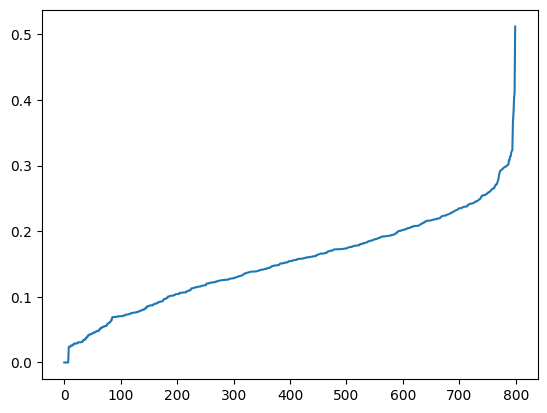

In [37]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [38]:
dbscan = DBSCAN(eps = 0.33, min_samples = 14)
pred = dbscan.fit_predict(train_data_RF5[metric_features])
anom_index = np.where(pred == -1)
train_data_RF5.drop(anom_index[0],inplace=True)
print('Percentage of data kept after removing outliers:', np.round(train_data_RF5.shape[0] / train_data_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.8912


### 4.4.6 Isolation Forest

In [39]:
train_data_RF6=train_data_RF.copy()
model=IsolationForest(contamination=0.03) #expected proportion of outliers to be 3%
model.fit(train_data_RF6.values)
anomaly=model.predict(train_data_RF6.values)
anom_index=np.where(anomaly==-1)
train_data_RF6.drop(anom_index[0],inplace=True)
print('Percentage of data kept after removing outliers:', np.round(train_data_RF6.shape[0] / train_data_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.97


In [40]:
metric_features

['Height',
 'High_Cholesterol',
 'Blood_Pressure',
 'Mental_Health',
 'Physical_Health',
 'Age',
 'BMI']

# 5. Feature Selection

In [54]:
x=train_data_RF.iloc[train_data_RF4.index]
y=train_data['Disease'].iloc[train_data_RF4.index]

In [55]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,stratify=y,shuffle=True) # split the training data into training set and validation set

In [101]:
#x_train_num = x_train.select_dtypes(include=np.number).set_index(x_train.index)
#x_train_cat = x_train.select_dtypes(exclude=np.number).set_index(x_train.index)
# DO IT for validation
#x_val_num = x_val.select_dtypes(include=np.number).set_index(x_val.index)
#x_val_cat = x_val.select_dtypes(exclude=np.number).set_index(x_val.index)

In [61]:
categorical_features = ['Drinking_Habit', 'Fruit_Habit', 'Water_Habit', 'Diabetes', 'Education']
numeric_features = x_train.drop(categorical_features, axis=1).columns

x_train_num = x_train[numeric_features]
x_train_cat = x_train[categorical_features]
# DO IT for validation
x_val_num = x_val[numeric_features]
x_val_cat = x_val[categorical_features]

In [62]:
scaler = MinMaxScaler().fit(x_train_num)
x_train_num_scaled = scaler.transform(x_train_num) # this will return an array
# Convert the array to a pandas dataframe
x_train_num_scaled = pd.DataFrame(x_train_num_scaled, columns = x_train_num.columns).set_index(x_train.index)
x_train_num_scaled.head(3)

,Height,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Smoking_Habit_Yes,Exercise_Yes,Region_East of England,Region_London,Region_North West,...,Region_South West,Region_West Midlands,Checkup_Less than three months,Checkup_More than 3 years,Checkup_Not sure,Gender,Age,Region_North East,Region_Yorkshire and the Humber,BMI
650,1.000000,0.376866,0.000000,0.615385,0.00,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.458333,0.0,0.0,0.987457
351,0.482759,0.227612,0.534884,0.500000,0.95,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.708333,0.0,0.0,0.804491
280,0.482759,0.645522,0.534884,0.769231,0.35,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.458333,0.0,0.0,0.945084


In [63]:
x_val_num_scaled = scaler.transform(x_val_num)
x_val_num_scaled = pd.DataFrame(x_val_num_scaled, columns = x_val_num.columns).set_index(x_val.index)
x_val_num_scaled.head(3)

,Height,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Smoking_Habit_Yes,Exercise_Yes,Region_East of England,Region_London,Region_North West,...,Region_South West,Region_West Midlands,Checkup_Less than three months,Checkup_More than 3 years,Checkup_Not sure,Gender,Age,Region_North East,Region_Yorkshire and the Humber,BMI
592,0.724138,0.384328,0.395349,0.576923,0.05,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.583333,0.0,0.0,0.144679
286,0.793103,0.320896,0.651163,0.615385,0.35,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.625000,0.0,0.0,0.819537
495,0.551724,0.250000,0.302326,0.653846,0.45,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.562500,0.0,1.0,0.562138


## 5.1 Filter Methods

### 5.1.1 Correlation with Disease

In [64]:
x_corr=x_train.copy()
x_corr['Disease']=y_train

In [65]:
corr_target=(abs(x_corr.corr()['Disease'])>0.05) #filter the variables with correlation to disease higher than 0.05 (abs.)
#train_data_RF4_filter=train_data_RF4_filter[c[c].index]

In [66]:
corr_target[corr_target].index

Index(['Drinking_Habit', 'Fruit_Habit', 'Water_Habit', 'Height',
       'High_Cholesterol', 'Blood_Pressure', 'Mental_Health',
       'Physical_Health', 'Diabetes', 'Smoking_Habit_Yes', 'Exercise_Yes',
       'Region_West Midlands', 'Checkup_More than 3 years', 'Checkup_Not sure',
       'Gender', 'Age', 'BMI', 'Disease'],
      dtype='object')

### 5.1.2 Correlation between the independent variables

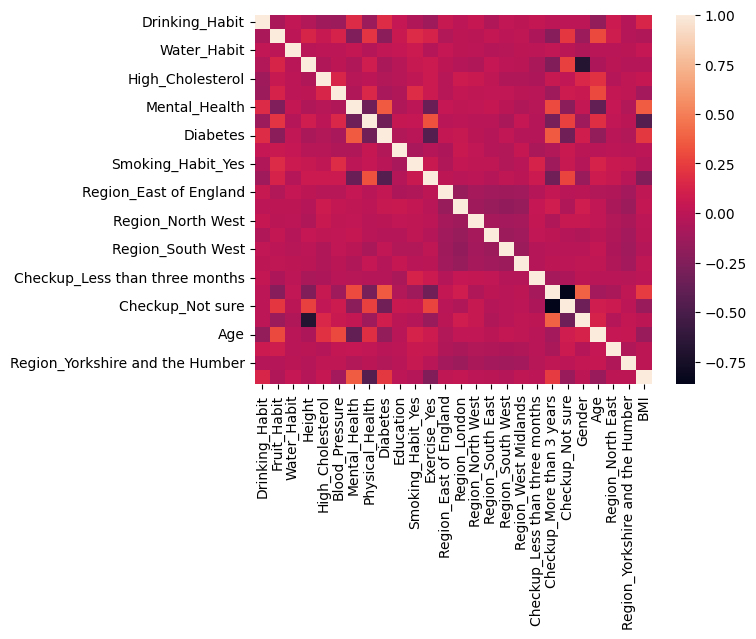

<Figure size 200x200 with 0 Axes>

In [108]:
sns.heatmap(x.corr())  #por favor melhorar isto 
plt.figure(figsize=(2,2))
plt.show()
#correlation between independent variables is not that high

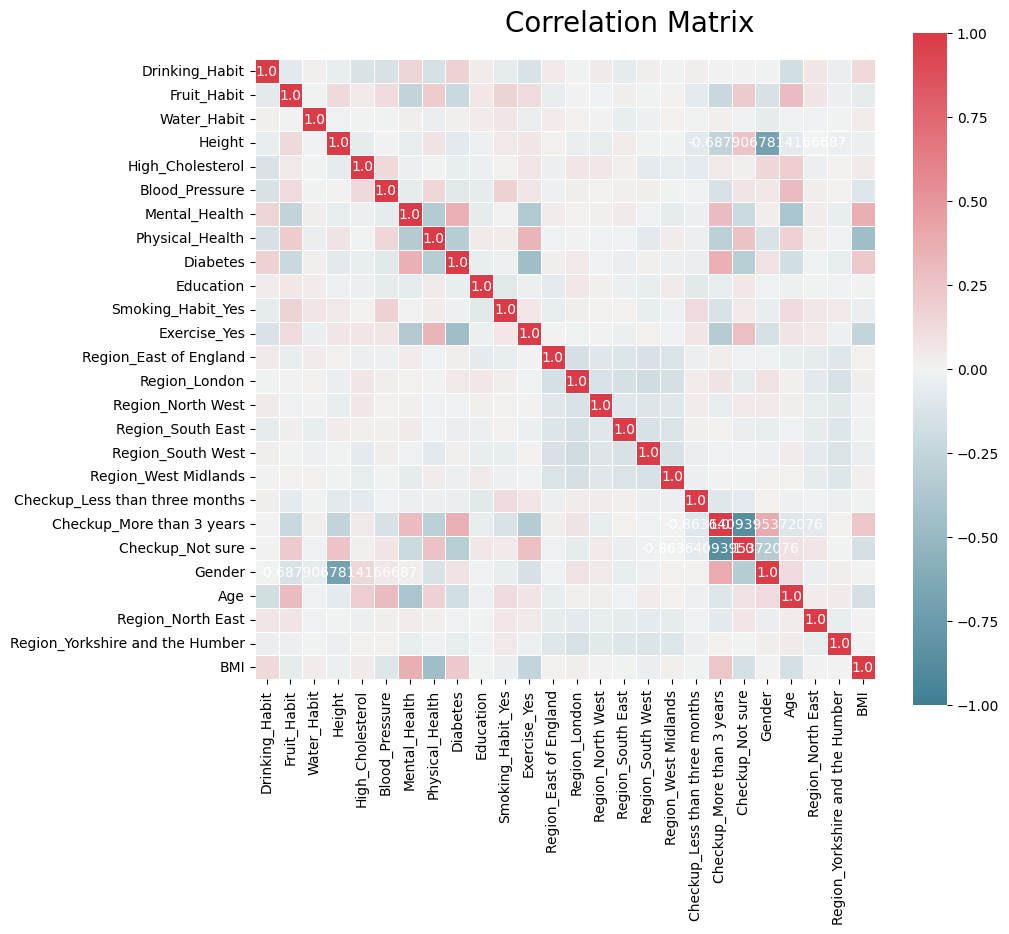

In [109]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(x.corr().values) >= 0.5
annot = np.where(mask_annot, x.corr().values, np.full(x.corr().shape,""))
# np.where() returns elements chosen from x.corr().values that satisfy the condition mask_annot

# Plot heatmap of the correlation matrix
sns.heatmap(data=x.corr(), annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

### 5.1.1 Spearman Correlation

In [71]:
all_train_num = x_train_num_scaled.join(y_train)

# function to plot the correlation between the variables
def cor_heatmap(cor):
    plt.figure(figsize=(15,15))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
    
# ver aula de data mining para melhorar o gráfico

In [69]:
cor_spearman = all_train_num.corr(method='spearman')
cor_spearman

,Height,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Smoking_Habit_Yes,Exercise_Yes,Region_East of England,Region_London,Region_North West,...,Region_West Midlands,Checkup_Less than three months,Checkup_More than 3 years,Checkup_Not sure,Gender,Age,Region_North East,Region_Yorkshire and the Humber,BMI,Disease
Height,1.000000,-0.015233,-0.008519,-0.027807,0.093257,-0.019443,0.050718,0.023435,-0.008039,-0.048290,...,-0.046345,-0.059021,-0.269021,0.262649,-0.643013,-0.040265,0.011358,-0.018925,-0.046948,-0.169766
High_Cholesterol,-0.015233,1.000000,0.147858,-0.049240,0.026124,0.051260,0.064342,-0.028650,0.074211,0.063866,...,-0.058119,-0.060171,0.045319,0.008313,0.152885,0.184565,-0.076345,0.024217,0.008283,-0.108475
Blood_Pressure,-0.008519,0.147858,1.000000,-0.021238,0.139003,0.098839,0.075663,-0.026517,0.054854,0.024383,...,-0.041784,-0.020151,-0.071619,0.025712,0.063663,0.317369,0.037721,0.000903,-0.094603,-0.125699
Mental_Health,-0.027807,-0.049240,-0.021238,1.000000,-0.396465,-0.001769,-0.332548,-0.013316,0.004038,0.048514,...,-0.049191,-0.062364,0.315810,-0.229074,0.019916,-0.374459,0.048720,-0.053660,0.361964,0.420268
Physical_Health,0.093257,0.026124,0.139003,-0.396465,1.000000,0.053768,0.306166,-0.014216,0.036472,0.012083,...,0.025569,-0.048001,-0.341243,0.305526,-0.124888,0.218113,-0.005204,-0.023075,-0.510278,-0.461220
Smoking_Habit_Yes,-0.019443,0.051260,0.098839,-0.001769,0.053768,1.000000,0.083356,-0.048661,0.039334,0.001768,...,-0.015808,0.037849,-0.083052,0.027853,0.021501,0.083483,0.085593,0.040677,-0.036174,-0.083052
Exercise_Yes,0.050718,0.064342,0.075663,-0.332548,0.306166,0.083356,1.000000,0.048920,-0.020510,0.001296,...,-0.006429,-0.003650,-0.350151,0.318265,-0.150117,0.066945,0.038749,-0.014722,-0.232955,-0.427420
Region_East of England,0.023435,-0.028650,-0.026517,-0.013316,-0.014216,-0.048661,0.048920,1.000000,-0.146814,-0.097518,...,-0.130415,-0.026126,-0.011545,0.012161,-0.043479,-0.017042,-0.059082,-0.105382,-0.000190,-0.035295
Region_London,-0.008039,0.074211,0.054854,0.004038,0.036472,0.039334,-0.020510,-0.146814,1.000000,-0.116962,...,-0.156419,0.038428,0.025715,-0.009903,0.059068,-0.013943,-0.070862,-0.126395,-0.002007,-0.026156
Region_North West,-0.048290,0.063866,0.024383,0.048514,0.012083,0.001768,0.001296,-0.097518,-0.116962,1.000000,...,-0.103898,0.075428,-0.021084,0.031143,0.039816,0.026173,-0.047069,-0.083955,0.002540,-0.021084


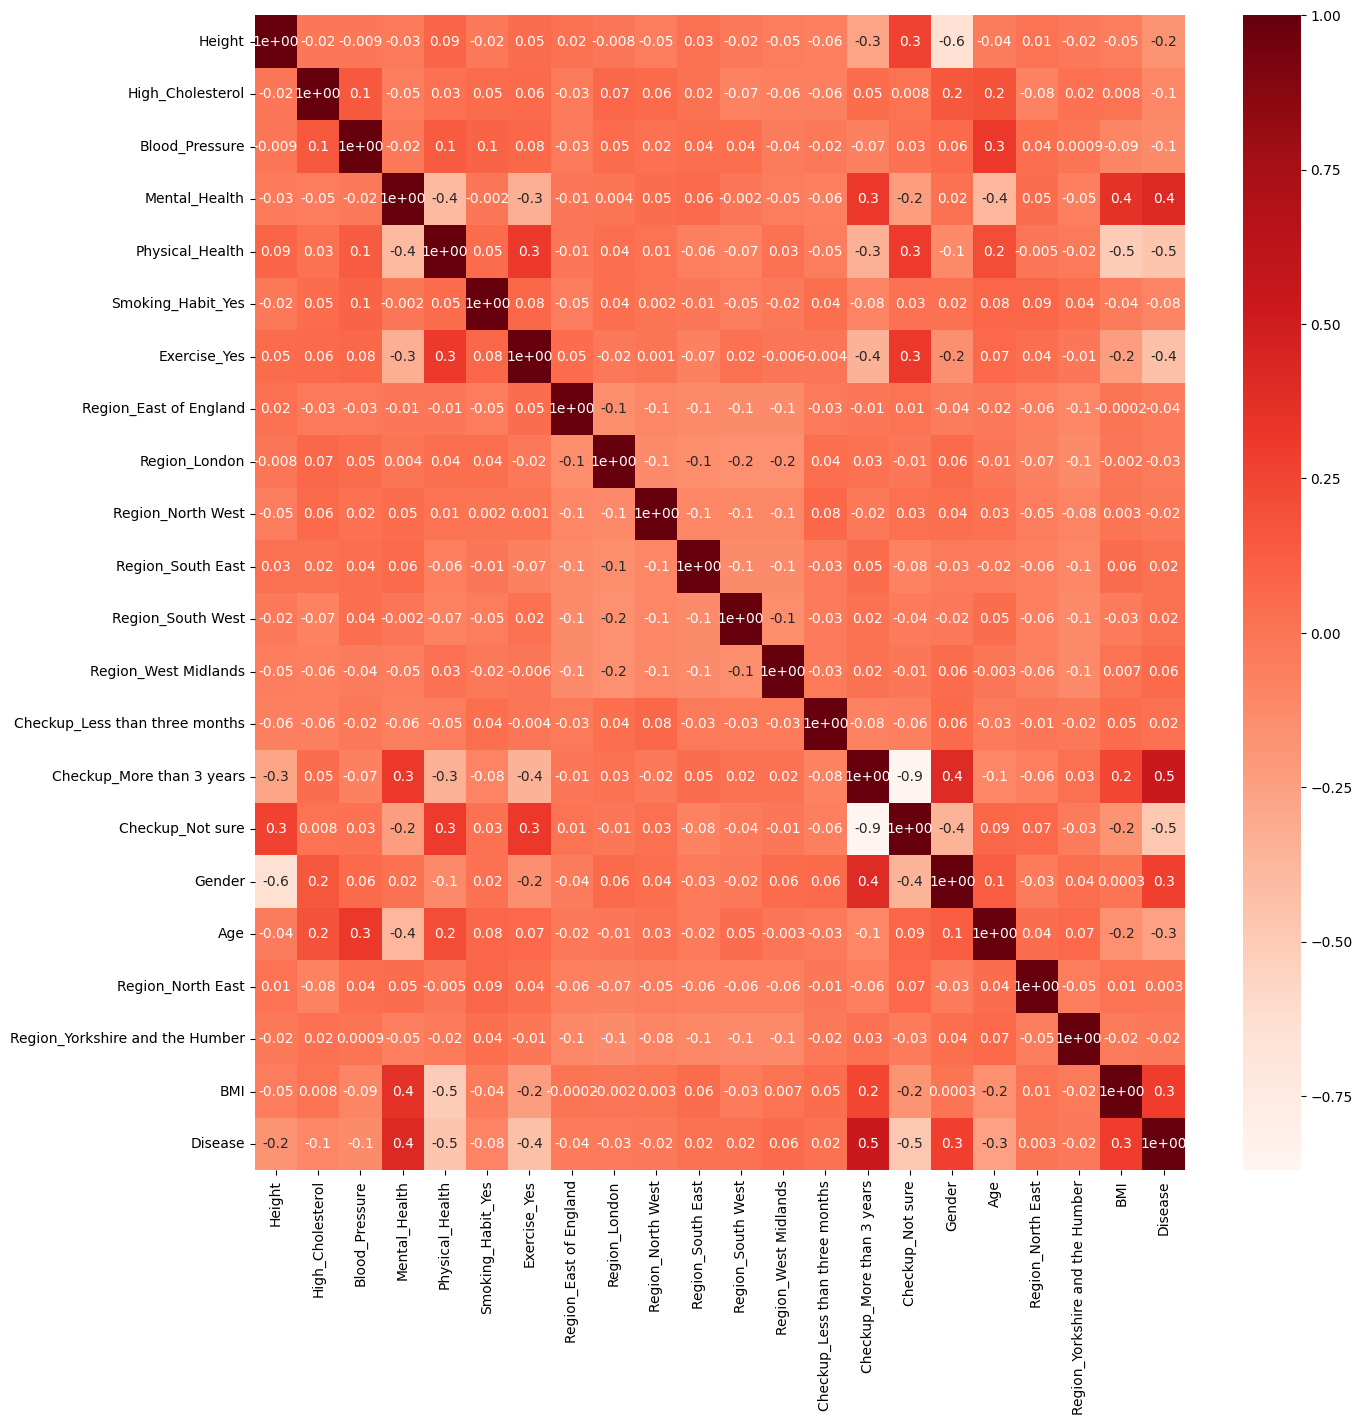

In [72]:
cor_heatmap(cor_spearman)

In [ ]:
# Tirar conclusões!!!!!!!!

### 5.1.2 (Univariate variables) Variance of the independent variables

In [67]:
#no quasi-constant features
x_train_num_scaled.var()  #find way to check for categorical variables

Height                             0.071632
High_Cholesterol                   0.029051
Blood_Pressure                     0.034952
Mental_Health                      0.042496
Physical_Health                    0.066192
Smoking_Habit_Yes                  0.128835
Exercise_Yes                       0.229903
Region_East of England             0.097344
Region_London                      0.127542
Region_North West                  0.067016
Region_South East                  0.095892
Region_South West                  0.108708
Region_West Midlands               0.107312
Checkup_Less than three months     0.005525
Checkup_More than 3 years          0.249839
Checkup_Not sure                   0.241733
Gender                             0.207907
Age                                0.034212
Region_North East                  0.027008
Region_Yorkshire and the Humber    0.076402
BMI                                0.076697
dtype: float64

There is no numeric variable that is univariate(variance = 0), so we don't need to drop anything.

### 5.1.3 ANOVA

### 5.1.4 Kendall's

### 5.1.5 Mutual Information

In [ ]:
# ver se fazemos este ou não

In [ ]:
mutual_info_classif(x_train,y_train) #took out the ones with 0  11 13 14 15 17 18 19 24 25

In [ ]:
mutual_info_classif(x_train,y_train)  #troca muito os valores cada vez que corro o código

In [ ]:
train_data_RF4_filter.columns

In [ ]:
mutual_info=['Smoking_Habit_Yes','Region_East of England','Region_London', 'Region_North West','Region_South West','Region_Yorkshire and the Humber']     
#arranjar forma de não ter de fazer isto à mão

## 5.2 Wrapper Methods

### 5.2.1 Recursive Feature Elimination (RFE)

In [73]:
model = LogisticRegression()

In [79]:
# Checking the score of the estimator using a different number of features

nof_list=list(range(1,len(numeric_features)+1))  # number of features
high_score=0
nof=0  # variable to store the optimum number of features
score_list =[]
for n in nof_list:
    model = LogisticRegression()
    rfe = RFE(estimator=model, n_features_to_select=n)
    x_train_rfe = rfe.fit_transform(x_train_num_scaled,y_train)
    x_val_rfe = rfe.transform(x_val_num_scaled)
    model.fit(x_train_rfe,y_train)
    
    score = model.score(x_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.818966


In [80]:
rfe = RFE(estimator = model, n_features_to_select = nof)
x_rfe = rfe.fit_transform(X=x_train_num_scaled, y=y_train)

# variables that were selected by RFE as the most "important" ones
selected_features_rfe = pd.Series(rfe.support_, index = x_train_num_scaled.columns)
selected_features_rfe

Height                             False
High_Cholesterol                    True
Blood_Pressure                      True
Mental_Health                       True
Physical_Health                     True
Smoking_Habit_Yes                  False
Exercise_Yes                        True
Region_East of England             False
Region_London                      False
Region_North West                  False
Region_South East                  False
Region_South West                  False
Region_West Midlands                True
Checkup_Less than three months     False
Checkup_More than 3 years           True
Checkup_Not sure                    True
Gender                              True
Age                                 True
Region_North East                   True
Region_Yorkshire and the Humber    False
BMI                                False
dtype: bool

In [81]:
# ranking of the variables defined by RFE
pd.Series(rfe.ranking_, index = x_train_num_scaled.columns)

Height                              9
High_Cholesterol                    1
Blood_Pressure                      1
Mental_Health                       1
Physical_Health                     1
Smoking_Habit_Yes                   8
Exercise_Yes                        1
Region_East of England              3
Region_London                       4
Region_North West                   6
Region_South East                   5
Region_South West                  11
Region_West Midlands                1
Checkup_Less than three months     10
Checkup_More than 3 years           1
Checkup_Not sure                    1
Gender                              1
Age                                 1
Region_North East                   1
Region_Yorkshire and the Humber     2
BMI                                 7
dtype: int32

### 5.2.2 Recursive Feature Elimination with Cross Validation (RFECV)

In [82]:
rfecv = RFECV(estimator = model, cv=10)
x_rfecv = rfecv.fit_transform(X=x_train_num_scaled, y=y_train)

# variables that were selected by RFECV as the most "important" ones
selected_features_rfecv = pd.Series(rfecv.support_, index = x_train_num_scaled.columns)
selected_features_rfecv

Height                             False
High_Cholesterol                    True
Blood_Pressure                     False
Mental_Health                       True
Physical_Health                     True
Smoking_Habit_Yes                  False
Exercise_Yes                        True
Region_East of England             False
Region_London                      False
Region_North West                  False
Region_South East                  False
Region_South West                  False
Region_West Midlands               False
Checkup_Less than three months     False
Checkup_More than 3 years           True
Checkup_Not sure                   False
Gender                              True
Age                                 True
Region_North East                  False
Region_Yorkshire and the Humber    False
BMI                                False
dtype: bool

In [83]:
# ranking of the variables defined by RFECV
pd.Series(rfecv.ranking_, index = x_train_num_scaled.columns)

Height                             13
High_Cholesterol                    1
Blood_Pressure                      2
Mental_Health                       1
Physical_Health                     1
Smoking_Habit_Yes                  12
Exercise_Yes                        1
Region_East of England              7
Region_London                       8
Region_North West                  10
Region_South East                   9
Region_South West                  15
Region_West Midlands                4
Checkup_Less than three months     14
Checkup_More than 3 years           1
Checkup_Not sure                    3
Gender                              1
Age                                 1
Region_North East                   5
Region_Yorkshire and the Humber     6
BMI                                11
dtype: int32

## 5.3 Embedded Methods

### 5.3.1 Lasso Regression

In [84]:
# function to plot the importance of the features
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [92]:
lasso_cv = LassoCV().fit(x_train_num_scaled, y_train)
selected_features_lasso = pd.Series(lasso_cv.coef_ ,index=x_train_num_scaled.columns)
selected_features_lasso

Height                            -0.000000
High_Cholesterol                  -0.162633
Blood_Pressure                    -0.019146
Mental_Health                      0.347616
Physical_Health                   -0.420162
Smoking_Habit_Yes                 -0.018903
Exercise_Yes                      -0.170986
Region_East of England            -0.000000
Region_London                     -0.012485
Region_North West                 -0.000000
Region_South East                 -0.002687
Region_South West                  0.000000
Region_West Midlands               0.051236
Checkup_Less than three months     0.000000
Checkup_More than 3 years          0.237646
Checkup_Not sure                  -0.064263
Gender                             0.118074
Age                               -0.164902
Region_North East                  0.000000
Region_Yorkshire and the Humber   -0.008600
BMI                                0.005739
dtype: float64

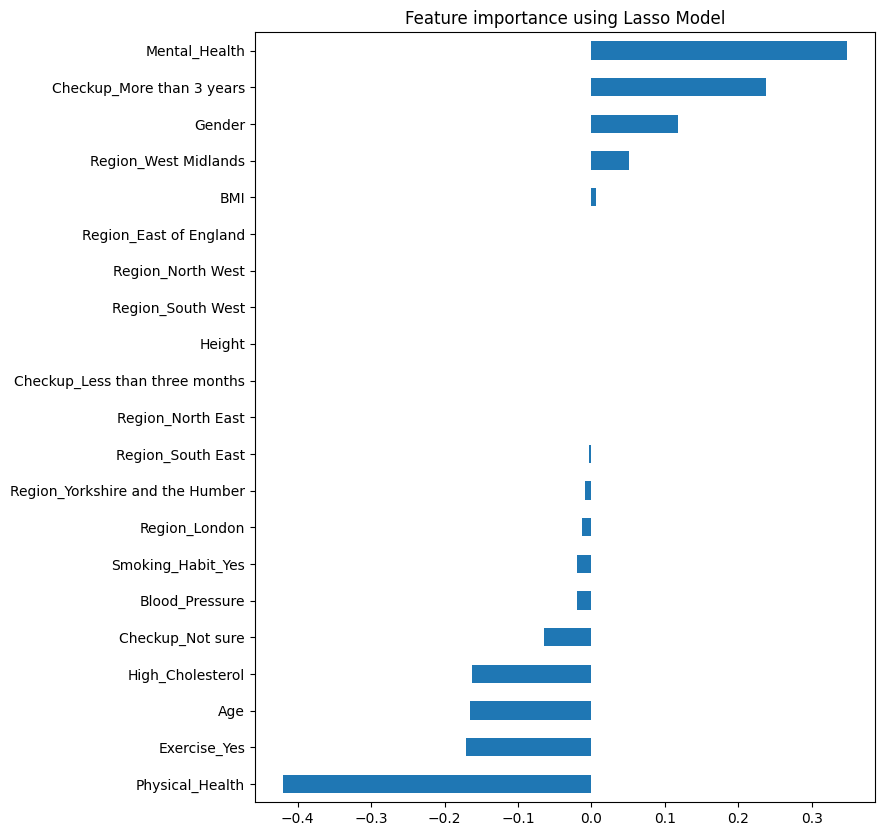

In [94]:
plot_importance(selected_features_lasso,'Lasso')

### 5.3.2 Ridge Regression